In [2]:
from veril import run, sample_variety, verifier
from veril.util.plots import *
import warnings; warnings.simplefilter('ignore') #some keras warning about future compatibility

In [3]:
sys_name = 'VanderPol'
max_deg =3 #so deg(V)=6

In [4]:
V0, Vdot, system = run.train_V(sys_name, max_deg = max_deg, epochs=20)





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 10)           100         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10, 2)        0                                            
__________________________________________________________________________________________________
dot_2 (Dot)                     (None, 2)            0           sequential_1[1][0]               
                                                                 input_2[0][0]                    
______

### Visualize V

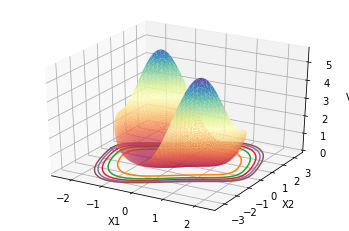

[None]

In [5]:
[plot3d(V0, sys_name, i) for i in system.all_slices]

### Visualize 30 $\dot{V}$ roots

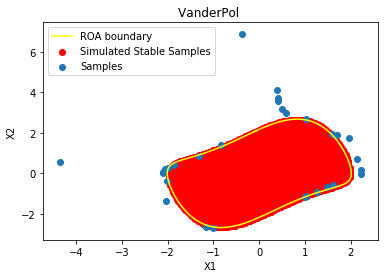

[None]

In [6]:
system.set_sample_variety_features(V0)
Vdot = system.sym_Vdot
variety = sample_variety.multi_to_univariate(Vdot)
[scatterSamples(sample_variety.sample_on_variety(variety, 30, slice_idx=i), sys_name, i) for i in system.all_slices]

# Sampling-variety SOS

1.507672322847634


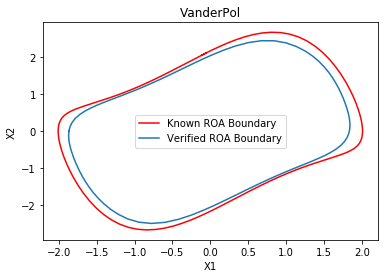

In [17]:
init_root_threads = 30 #initial guess of number of roots needed

is_vanishing = False
samples = sample_variety.sample_on_variety(variety, init_root_threads)
while not is_vanishing:
    samples_monomial, Tinv = sample_variety.sample_monomials(system, samples, variety)
    V, rho, P = sample_variety.solve_SDP_on_samples(system, samples_monomial)
    is_vanishing, new_sample = sample_variety.check_vanishing(system, variety, rho, P, Tinv)
    samples = np.vstack((samples, new_sample))
print(rho)
plot_funnel(V, sys_name, system.slice)

In [18]:
myfile = open("sampling-aided-logs.txt")
print(myfile.read())
myfile.close()


File opened at Tue Dec 17 17:45:42 2019 by MOSEK version 9.0.96.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 35              
  Cones                  : 0               
  Scalar variables       : 1               
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : 

## Compare w. equality constrained SOS

rho is 1.4914926881853867


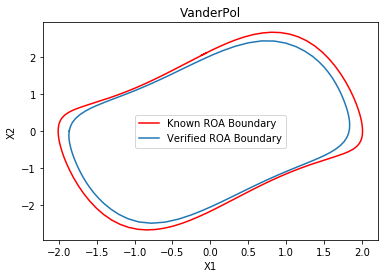

In [19]:
run.verify_via_equality(system, V0)

In [20]:
myfile = open("equality-constrained-logs.txt")
print(myfile.read())
myfile.close()


File opened at Tue Dec 17 17:45:50 2019 by MOSEK version 9.0.96.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 152             
  Cones                  : 0               
  Scalar variables       : 46              
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
